In [ ]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [ ]:
with con:
  con.execute("""
    CREATE TABLE USER (
      id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
      name TEXT,
      age INTEGER
    );
  """)

In [ ]:
sql = 'INSERT INTO USER (id, name, age) values (?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3 , 'Chris', 23)
]

In [ ]:
with con:
  con.executemany(sql,data)

In [ ]:
with con:
  data = con.execute("SELECT * FROM USER WHERE age <= 22")
  for row in data:
    print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [ ]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id':[1,1,2,2,3,3,3],
    'skill':['Network Security','Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [ ]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
    SELECT s.user_id, u.name, u.age, s.skill
    FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
    ''', con)

df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [ ]:
df.to_sql('USER_SKILL', con)

In [ ]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [ ]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [ ]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-09


In [ ]:
%sql SELECT date('now', 'start of month', '+1 month', '-1 day');

 * sqlite:///demo.db3
Done.


"date('now', 'start of month', '+1 month', '-1 day')"
2022-11-30


In [ ]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [ ]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [ ]:
def dt(days):
  return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
  timestamp = now - dt(days=(N_rows - i))
  temperature = uniform(18,26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [ ]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-06-27 09:12:41,21.242820459125976
2021-06-28 09:12:41,25.372356820389772
2021-06-29 09:12:41,24.5961627604267
2021-06-30 09:12:41,20.06355015867758
2021-07-01 09:12:41,21.560941314310945


In [ ]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-06-27 09:12:41.642671,21.242820459125976
2021-06-28 09:12:41.642671,25.372356820389772
2021-06-29 09:12:41.642671,24.5961627604267
2021-06-30 09:12:41.642671,20.06355015867758
2021-07-01 09:12:41.642671,21.560941314310945
2021-07-02 09:12:41.642671,24.116125608265016
2021-07-03 09:12:41.642671,18.274815088803496
2021-07-04 09:12:41.642671,22.23588048110158
2021-07-05 09:12:41.642671,18.03153641091119
2021-07-06 09:12:41.642671,24.436758473061786


In [ ]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-06-27 09:12:41.642671,21.242820459125976
2021-06-28 09:12:41.642671,25.372356820389772
2021-06-29 09:12:41.642671,24.5961627604267
2021-06-30 09:12:41.642671,20.06355015867758
2021-07-01 09:12:41.642671,21.560941314310945
2021-07-02 09:12:41.642671,24.116125608265016
2021-07-03 09:12:41.642671,18.274815088803496
2021-07-04 09:12:41.642671,22.23588048110158
2021-07-05 09:12:41.642671,18.03153641091119
2021-07-06 09:12:41.642671,24.436758473061786


In [ ]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
       AVG(Temperature) as MEAN_TMP,
       MAX(Temperature) as MAX_TMP,
       MIN(Temperature) as MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.04681886001707,25.983292324584426,18.03153641091119
2022,21.99440945223115,25.987587087400865,18.012039541075005


In [ ]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-06-27 09:12:41', '2021-06-28 09:12:41',
               '2021-06-29 09:12:41', '2021-06-30 09:12:41',
               '2021-07-01 09:12:41', '2021-07-02 09:12:41',
               '2021-07-03 09:12:41', '2021-07-04 09:12:41',
               '2021-07-05 09:12:41', '2021-07-06 09:12:41',
               ...
               '2022-10-30 09:12:41', '2022-10-31 09:12:41',
               '2022-11-01 09:12:41', '2022-11-02 09:12:41',
               '2022-11-03 09:12:41', '2022-11-04 09:12:41',
               '2022-11-05 09:12:41', '2022-11-06 09:12:41',
               '2022-11-07 09:12:41', '2022-11-08 09:12:41'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

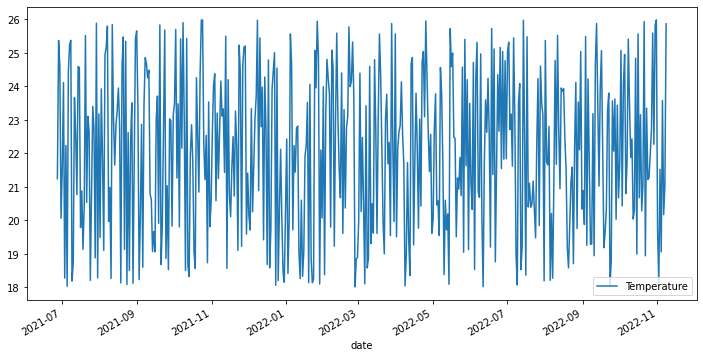

In [ ]:
df.plot(figsize=(12,6))